In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

cifar_10 = tf.keras.datasets.cifar10

In [36]:
def load_cifar10():
  '''
  train_X = np.load("cifar10_train_X.npy")
  train_y = np.load("cifar10_train_y.npy")
  test_X = np.load("cifar10_test_X.npy")
  test_y = np.load("cifar10_test_y.npy")
  '''
  (train_X,train_y), (test_X,test_y) = cifar_10.load_data()

  train_X = train_X/255.0
  test_X = test_X/255.0

  train_y = tf.keras.utils.to_categorical(train_y, 10)
  test_y = tf.keras.utils.to_categorical(test_y,10)

  return train_X,train_y,test_X,test_y


In [8]:
def make_model(num_classes, input_shape):

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape = input_shape))
  model.add(tf.keras.layers.Conv2D(kernel_size = (3,3),filters = 32, activation = "relu"))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64, activation = "relu"))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Conv2D(kernel_size = (3,3),filters = 128, activation = "relu"))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.GlobalAveragePooling2D())
  model.add(tf.keras.layers.Dense(128,activation = "relu"))
  model.add(tf.keras.layers.Dense(num_classes,activation = "softmax"))

  return model

In [13]:
train_X,train_y, test_X,test_y = load_cifar10()

num_classes = test_y[0].shape
#print(num_classes, train_X[0].shape)
model = make_model(num_classes[0],train_X[0].shape)

model.summary()
epochs = 30
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["Accuracy"])

hist = model.fit(train_X,train_y,epochs = epochs, shuffle = True,validation_split = 0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 128)       

In [6]:
model.evaluate(test_X,test_y)

313/313 [==============================] - 1s 3ms/step - loss: 1.6269 - Accuracy: 0.7052


[1.62687349319458, 0.7052000164985657]

In [ ]:
def get_topk_accuracy(test_y, pred_y, k = 1):
  true_labels = np.argmax(test_y,axis = 1)

In [29]:
def plotting(hist):
  train_loss = hist.history["loss"]

  x = np.arange(1,len(train_loss)+1)
  fig,ax = plt.subplots()
  plt.plot(x,train_loss)



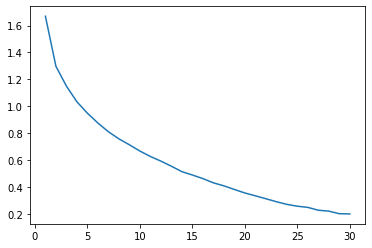

In [30]:
plotting(hist)